In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def Relu(z):
    return np.maximum(0,z).astype(float)

def derivativeRelu(x):
    return (x > 0).astype(float)

In [60]:
class layer:
    def __init__(self, input, units):
        self.alpha = 0.005
        self.input = input.astype(float)
        self.weights = np.random.rand(units,self.input.shape[0]).astype(float)
        self.bias = np.random.rand(units,1).astype(float)
        self.dz = 0
        self.dw = 0
        self.db = 0
        self.da = 0
        self.z = 0
        self.output = 0

    def forward(self):
        z = np.dot(self.weights, self.input) + self.bias
        self.output = sigmoid(z)
        return self.output
    
    def forward_relu(self):
        self.z = np.dot(self.weights, self.input) + self.bias
        self.output = Relu(self.z)
        return self.output
    
    def backward(self, dz, m, l):
        if l > 1:
            self.dz = np.multiply(np.dot(np.transpose(self.weights),dz),self.input*(1-self.input))
        self.db = 1/m*np.sum(dz, axis=1, keepdims=True)
        self.dw = 1 / m * np.dot(dz,np.transpose(self.input))
        self.weights = self.weights - self.alpha*self.dw
        self.bias = self.bias - self.alpha*self.db
        return self.dz

    def backward_relu(self, dz, m, l, z):
        if l > 1:
           self.dz = np.multiply(np.dot(np.transpose(self.weights),dz),derivativeRelu(z))
        self.db = 1/m*np.sum(dz, axis=1, keepdims=True)
        self.dw = 1 / m * np.dot(dz,np.transpose(self.input))
        self.weights = self.weights - self.alpha*self.dw
        self.bias = self.bias - self.alpha*self.db
        return self.dz


In [61]:
data = pd.read_csv("trainOr.csv", header=None)
data.head()
input = data.iloc[:,0:-1].to_numpy()
input = input.T
input = input.astype('float64')
#print(input)
output = data.iloc[:,-1].to_numpy().astype('float64')
#print(output)


In [62]:
print(input.shape)
print(output.shape)
alpha = 0.05

(3, 127)
(127,)


In [ ]:
a1 = np.random.rand(2,8)
a2 = np.random.rand(2,)
print(a1)
print(np.transpose(a2).shape)
print(np.add(np.dot(np.transpose(a1),a2),np.random.rand(8,)))

In [ ]:
layer_1 = layer(input,6)
layer_2 = layer(layer_1.forward(),1)
A = layer_2.forward()
dA = -(output/A) + ((1 - output)/(1 - A))
der = A
der[der >= 0] = 1
der[der < 0] = 0.01
dZ = dA * der
#dZ = dA * A * (1 - A)

In [ ]:
print(dZ)

In [63]:
layer_1_s = layer(input,8)
layer_2_s = layer(layer_1_s.forward(),1)
m = input.shape[1]
loss_s = []
l_s = 0
for i in range(1000):
    layer_2_s.input = layer_1_s.forward()
    A = layer_2_s.forward()
    dA = -(output/A) + ((1 - output)/(1 - A))
    dZ = dA * A * (1 - A)
    l_s =  1/m*np.sum(-output*np.log(A)-(1-output)*np.log(1-A))
    loss_s.append(l)
    dz1 = layer_2_s.backward(dZ.astype(float), m, 2)
    layer_1_s.backward(dz1.astype(float),m, 1)

In [64]:
layer_1 = layer(input,6)
layer_2 = layer(layer_1.forward_relu(),1)
m = input.shape[1]
loss = []
l = 0
for i in range(1000):
    layer_2.input = layer_1.forward_relu()
    A = layer_2.forward_relu()
    #print(A)
    dA = 2*(A - output)
    dZ = dA * derivativeRelu(layer_2.z)
    l =  1/(m)*np.sum(np.power((A - output),2))
    loss.append(l)
    dz1 = layer_2.backward_relu(dZ.astype(float), m, 2, layer_1.z)
    layer_1.backward_relu(dz1.astype(float),m, 1, 0)

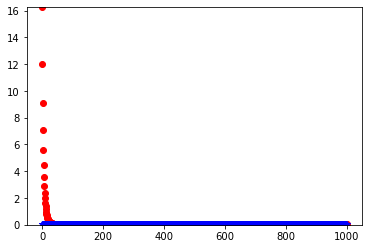

In [65]:
#loss = np.array(loss)
#print(loss)
plt.ylim(0,np.max(loss))
plt.plot(loss, 'ro')
plt.plot(loss_s, 'b*')
plt.draw()

In [66]:
input_test = input[:,-5:-1]
print(input_test)
layer_1.input = input_test
layer_2.input = layer_1.forward_relu()
print(layer_2.forward_relu())

[[0. 1. 0. 0.]
 [0. 1. 1. 0.]
 [0. 1. 0. 1.]]
[[0.44254315 1.28467083 0.78187525 0.74373203]]


In [67]:
layer_1_s.input = input_test
layer_2_s.input = layer_1_s.forward()
print(layer_2.forward())

[[0.60886484 0.78324381 0.68608413 0.67781141]]


In [4]:
array = np.array([1,-2,0,4,0,0,2,0,6,-5,0]).astype('float64')
#array[array >= 0] = 1
array = (array < 0).astype(float)
print(array)

[0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
